## import package

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

## Membaca Dataset dan Data Cleaned

In [2]:
df = pd.read_csv('android_traffic.csv', sep=';')

df_copy = df.copy()

## Menghapus kolom bernilai NaN
df_cleaned = df_copy.drop(columns=['duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate'], axis = 1)


## X adalah Independent dan Y adalah Dependent, dan Labeling pada x dan y

In [3]:

x = df_cleaned.iloc[:, :-1].values
y = df_cleaned.iloc[:, 13].values

encode = OneHotEncoder(handle_unknown='ignore')

x = encode.fit_transform(x).toarray()

label_encode = LabelEncoder()

y = label_encode.fit_transform(y)

## Training set dan Testing set

In [4]:
x_train, x_test, y_train, y_test = train_test_split(\
                                                     x,
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 0)


## Menghitung n_neighbors

In [5]:
len(y_test)

1569

In [6]:
import math
math.sqrt(len(y_test))

39.61060464067672

## Classifier KNeighbors

In [7]:
classifier = KNeighborsClassifier(n_neighbors = 39, metric = 'euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=39)

In [8]:
y_pred = classifier.predict(x_test)

y_pred

array([0, 0, 0, ..., 0, 0, 1])

### Confusion Matrix

In [9]:
cm = confusion_matrix(y_test, y_pred)

In [10]:
print(cm)

[[845  78]
 [ 71 575]]


In [11]:
report = classification_report(y_test, y_pred)

In [12]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       923
           1       0.88      0.89      0.89       646

    accuracy                           0.91      1569
   macro avg       0.90      0.90      0.90      1569
weighted avg       0.91      0.91      0.91      1569



## Accuracy

In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9050350541746335


## visualisasi

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder

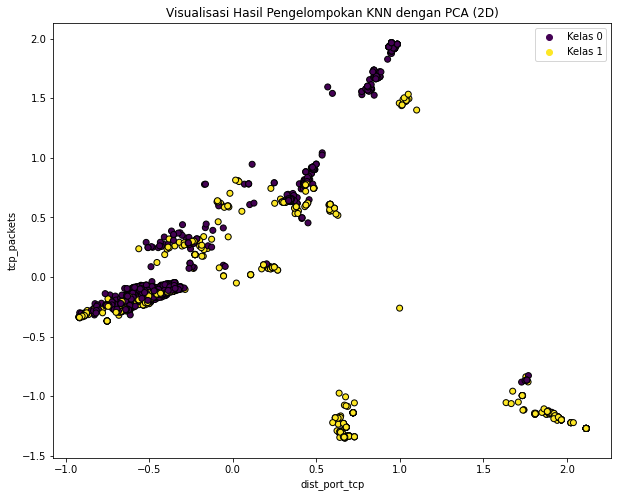

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(x_train)

knn_model = KNeighborsClassifier(n_neighbors = 39)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

X_pca_test = pca.transform(x_test)

X_pca_with_pred = np.column_stack((X_pca_test, y_pred))

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_with_pred[:, 0], X_pca_with_pred[:, 1], c=X_pca_with_pred[:, 2], cmap='viridis', 
                      edgecolors='k', label='Kelas')

legend_labels = ['Kelas 0', 'Kelas 1']  # Ganti sesuai dengan kelas Anda
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.title('Visualisasi Hasil Pengelompokan KNN dengan PCA (2D)')
plt.xlabel('dist_port_tcp')
plt.ylabel('tcp_packets')
plt.show()

Visualisasi Confusion Matrix

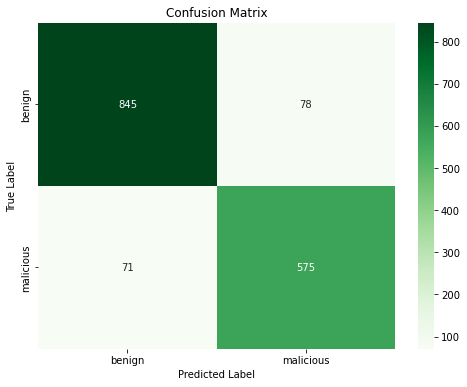

In [16]:
def plot_confusion_matrix(conf_matrix, target_names, title='Confusion Matrix', cmap=None, normalize=False):
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt=".2f" if normalize else "d", cmap=cmap, xticklabels=target_names, yticklabels=target_names)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
plot_confusion_matrix(cm, target_names=['benign', 'malicious'], title='Confusion Matrix', cmap='Greens', normalize=False)